In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

%matplotlib inline

In [57]:
act = pd.read_csv('data/atusact_2014.dat')
cps = pd.read_csv('data/atuscps_2014.dat')
resp = pd.read_csv('data/atusresp_2014.dat')
rost = pd.read_csv('data/atusrost_2014.dat')
atussum = pd.read_csv('data/atussum_2014.dat') 
who = pd.read_csv('data/atuswho_2014.dat')

In [58]:
resp.head()
#resp['TRTHHFAMILY'] 
#resp['TRTNOCHILD']
new_data = pd.concat([resp['TRTHHFAMILY'], resp['TRTNOCHILD']], axis=1, keys=['1', '2'])
new_data.corr()

,1,2
1,1.000000,0.168112
2,0.168112,1.000000


In [59]:
rost.head()

,TUCASEID,TULINENO,TEAGE,TERRP,TESEX,TXAGE,TXRRP,TXSEX
0,20140101140007,1,20,19,2,0,0,0
1,20140101140007,2,19,21,1,0,0,0
2,20140101140007,3,0,22,1,0,0,0
3,20140101140011,1,16,18,2,0,0,0
4,20140101140011,2,33,24,2,0,0,0


In [60]:
atussum.rename(columns={'TEAGE':'Age', 'TESEX':'Sex', 'tucaseid':'ID', 't120302':'drug_use','t120301':'relaxing_thinking', 't050101':'working'}, inplace=True)
atussum.rename(columns={'t120303':'TV','t120305':'Radio','t140101':'religious','t160101':'phone', 't120313':'writing'}, inplace=True)
atussum.rename(columns={'t120404':'gambling', 't010101':'sleeping','t500106':'gap', 't180501':'work_travel'}, inplace=True)
interesting_data = pd.concat([atussum['ID'], atussum['Age'], atussum['Sex'], atussum['drug_use'], atussum['relaxing_thinking']], axis=1, keys=['ID', 'Age', 'Sex', 'drug_use', 'relaxing_thinking'])
interesting_data['working'] = atussum['working']
interesting_data['TV'] = atussum['TV']
interesting_data['Radio'] = atussum['Radio']
interesting_data['religious'] = atussum['religious']
interesting_data['phone'] = atussum['phone']
interesting_data['writing'] = atussum['writing']
interesting_data['gambling'] = atussum['gambling']
interesting_data['sleeping'] = atussum['sleeping']
interesting_data['gap'] = atussum['gap']
interesting_data['work_travel'] = atussum['work_travel']
#atussum = atussum.corr()
print(atussum['sleeping'])

0        1145
1         540
2         555
3         780
4         645
5         240
6         585
7         450
8         425
9         520
10        495
11        670
12        690
13        531
14        510
15        380
16        459
17        535
18        440
19        720
20        478
21        405
22        590
23        480
24        690
25        630
26        420
27        510
28        518
29        640
         ... 
11562     660
11563     548
11564     720
11565     540
11566     555
11567     425
11568     540
11569     610
11570     463
11571     530
11572     600
11573     656
11574     550
11575     600
11576     530
11577     660
11578     650
11579     480
11580     510
11581     660
11582     555
11583     330
11584     450
11585     405
11586     705
11587     495
11588     730
11589     480
11590     590
11591     540
Name: sleeping, dtype: int64


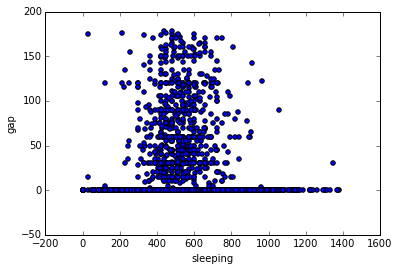

In [63]:
atussum.plot(kind = 'scatter', x = 'sleeping', y = 'gap')